#  NLP-lab :  Word embeddings

In this series of exercises, we will explore three word embeddings:

* [Collobert & Weston](http://www.jmlr.org/papers/volume12/collobert11a/collobert11a.pdf) https://ronan.collobert.com/senna/
* [Word2Vec](https://arxiv.org/abs/1301.3781)
* [BERT](https://huggingface.co/bert-base-uncased)


In the code already provided, add your code to the place indicated by `YOUR CODE HERE`.

**Important** : do NOT commit the data and embedding files in your repository git : it is a waste of resources and it takes more time to clone.
> Use https://docs.github.com/en/get-started/getting-started-with-git/ignoring-files


In [ ]:
# !pip install seaborn
# !pip install scikit-learn

In [ ]:
# basic imports
import os
import matplotlib.pyplot as plt
# display matplotlib graphics in notebook
%matplotlib inline
import seaborn as sns

# disable warnings for libraries
import warnings
warnings.filterwarnings("ignore")

# configure logger
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')
logger = logging.getLogger(__name__)


###  Embeddings exploration with Collobert's embeddings

Upload the files containing the embeddings to `data`:
* Collobert (size 50): [collobert_embeddings.txt.zip](https://storage.teklia.com/shared/deepnlp-labs/collobert_embeddings.txt.zip) which contains the embedding vectors and [collobert_words.lst](https://storage.teklia.com/shared/deepnlp-labs/collobert_words.lst) which contains the associated words;

You need to unzip the files to load them.

Feel free to open the files to see what they contain (it's sometimes surprising).

#### Question:
>* Add the files to your .gitignore
>* Give the size in Mb of the embeddings files before unzipping.
>* By exploring the content of the embedding files, give the number of words for which these files provide embeddings.



### List of closest words

The aim of this exercise is to list the closest words to a given word for the Collobert embedding. First, we'll load the vectors of the Collobert embedding into a numpy array and the associated words into a python list. Then we'll use the [scipy KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) data structure to quickly search for the vectors closest to a series of words.


#### Question:
>* load embedding vectors from the file `data/collobert_embeddings.txt` using the numpy function [genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
>* load the words associated with the vectors from the `data/collobert_words.lst` file into a python list (using `open()` and `readlines()`)
>* check that the sizes are correct


In [ ]:
import zipfile
import os

#load data
zip_path = "/content/collobert_embeddings.txt.zip"
extract_path = "/content/data"

if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Fichier décompressé avec succès dans :", extract_path)
else:
    print("Le fichier zip n'existe pas.")


Fichier décompressé avec succès dans : /content/data


In [ ]:
import numpy as np

#embeddings
embedding_file = "data/collobert_embeddings.txt"
embeddings = np.genfromtxt(embedding_file, delimiter=" ")

#mots associés
words_file = "data/collobert_words.lst"
with open(words_file, "r") as f:
    words = f.readlines()

# Nettoyer la liste des mots (supprimer les espaces et les sauts de ligne)
words = [word.strip() for word in words]

# tailles
print(f"Nombre de mots chargés : {len(words)}")
print(f"Dimensions des embeddings : {embeddings.shape}")

# Verification
if embeddings.shape[0] == len(words):
    print("ok : nb de mots = nb d'embedding, chaque mot a un embedding associé")
else:
    print("probleme : les dimensions ne correspondent pas.")



Nombre de mots chargés : 130000
Dimensions des embeddings : (130000, 50)
ok : nb de mots = nb d'embedding, chaque mot a un embedding associé


KD trees are a very efficient data structure for storing large sets of points in a multi-dimensional space and performing very efficient nearest-neighbour searches.

#### Question
> * Initialise the [KDTree](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html) structure with Collobert's embedding vectors.
> * Using the [tree.query](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.query.html#scipy.spatial.KDTree.query) function, display the 5 nearest words for the following words: ‘mother’, ‘computer’, ‘dentist’, ‘war’, ‘president’, ‘secretary’, ‘nurse’.  *Hint: you can use the function `collobert_words.index(w)` to obtain the index of a word in the list of words*.
> * Create a `words_plus_neighbors` list containing the words and all their neighbours (for the next question)

In [ ]:
from scipy import spatial
from scipy.spatial import KDTree

tree = KDTree(embeddings)

#words
query_words = ['mother', 'computer', 'dentist', 'war', 'president', 'secretary', 'nurse']

# 5 nearest neighbors for each
words_plus_neighbors = []
for word in query_words:
    words_plus_neighbors.append(word)
    if word in words:
        index = words.index(word)  # index du mot dans la liste words
        _, neighbor_indices = tree.query(embeddings[index], k=5)  #5 nearest neighbors
        neighbors = [words[i] for i in neighbor_indices]
        words_plus_neighbors.extend(neighbors)

        print(f"Les 5 mots les plus proches de '{word}' sont : {neighbors}")
    else:
        print(f"Le mot '{word}' n'est pas dans le dictionnaire.")


Les 5 mots les plus proches de 'mother' sont : ['mother', 'daughter', 'wife', 'father', 'husband']
Les 5 mots les plus proches de 'computer' sont : ['computer', 'laptop', 'multimedia', 'desktop', 'software']
Les 5 mots les plus proches de 'dentist' sont : ['dentist', 'pharmacist', 'midwife', 'physician', 'housekeeper']
Les 5 mots les plus proches de 'war' sont : ['war', 'revolution', 'death', 'court', 'independence']
Les 5 mots les plus proches de 'president' sont : ['president', 'governor', 'chairman', 'mayor', 'secretary']
Les 5 mots les plus proches de 'secretary' sont : ['secretary', 'minister', 'treasurer', 'chairman', 'commissioner']
Les 5 mots les plus proches de 'nurse' sont : ['nurse', 'physician', 'veterinarian', 'dentist', 'surgeon']


In [ ]:
words_plus_neighbors = np.unique(words_plus_neighbors)


### Visualisation with T-SNE

Embeddings are vectors with several hundred dimensions. It is therefore not possible to display them in their original space. However, it is possible to apply dimension reduction algorithms to display them in 2 or 3 dimensions. One of the dimension reduction algorithms allowing 2D visualisation is [tSNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding).

#### Question
> * Create a `word_vectors` object of type `np.array` from a list containing all the embeddings of the words in the `words_plus_neighbors` list.
> * Create a tSNE object from the `from sklearn.manifold import TSNE` library with the parameters `random_state=0`, `n_iter=2000` and `perplexity=15.0` for a 2-dimensional view.
> * Calculate *T* the tSNE transformation of the `word_vectors` by applying function `.fit_transform(word_vectors)` to the tSNE object. This function estimates the parameters of the tSNE transformation and returns the reduced-dimension representation of the vectors used for estimation.
> * Use the `scatterplot` function from [seaborn](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) to represent points in 2 dimensions and add word labels using the `plt.annotate` function.

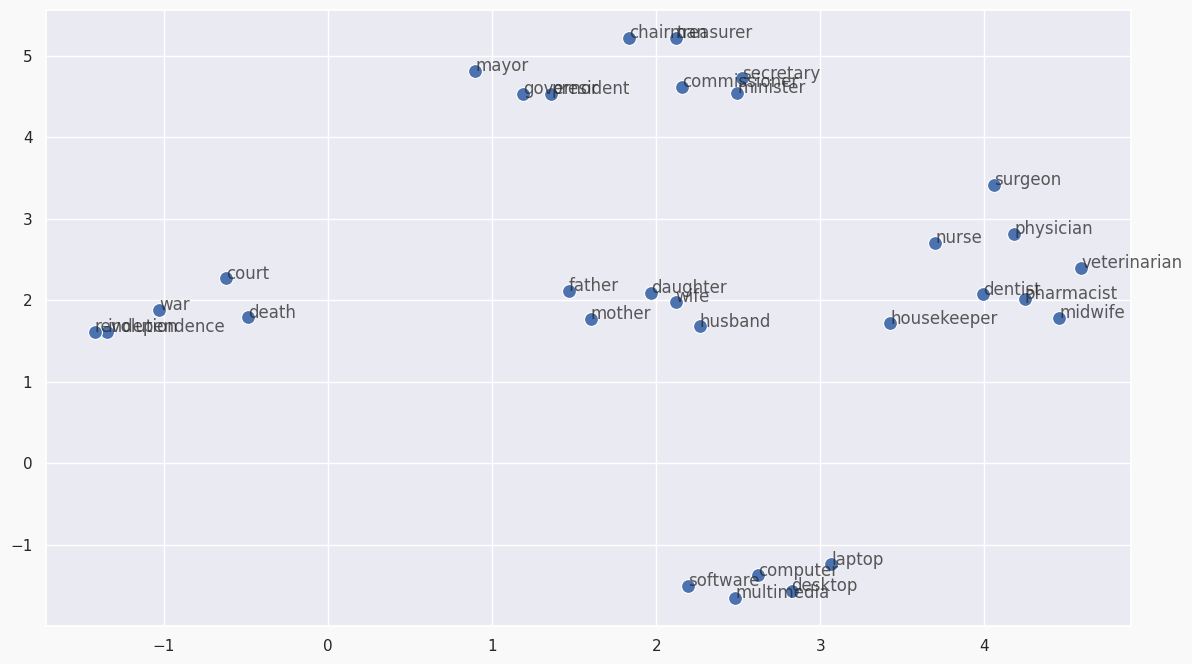

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#word embeddings of words_plus_neighbors
word_vectors = np.array([embeddings[words.index(word)] for word in words_plus_neighbors if word in words])

# create the tSNE transform
tsne = TSNE(n_components=2, random_state=0, n_iter=2000, perplexity=15.0)


# fit and transform the word vectors, store in T
T = tsne.fit_transform(word_vectors)


fig = plt.figure(figsize=(14, 8))
fig.patch.set_facecolor('#f9f9f9')

sns.set(rc={'figure.figsize':(14, 8)})
sns.set(font_scale=1)

sns.scatterplot(x=T[:, 0], y=T[:, 1], s=100)

for i, word in enumerate(words_plus_neighbors):
    if word in words:
        plt.annotate(word, (T[i, 0], T[i, 1]), fontsize=12, alpha=0.75)




### Semantic arithmetic with Word2Vec

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.


We will use a Word2Vec model pre-trained on the French Wac corpus.  This model has been trained on a corpus of 1 billion French words.

This embedding is available in 2 formats:
- a text format for easy exploration of the model :
    - frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt)
- a binary format that can be loaded using the Gensim library:
    - [enWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin](https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin)

Download the text file onto your machine to analyse it.

#### Question:
>* Add the file to your .gitignore
>* Give the size in Mb of the embedding files
>* By exploring the contents of the embedding file in text format, give the number of words for which this model provides embeddings and the size of the embedding for each word.



YOUR ANSWER HERE

In [ ]:
!wget https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt

--2025-02-21 10:01:19--  https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt
Resolving storage.teklia.com (storage.teklia.com)... 167.233.8.58
Connecting to storage.teklia.com (storage.teklia.com)|167.233.8.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 614381407 (586M) [text/plain]
Saving to: ‘frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt’

frWac_non_lem_no_po 100%[===================>] 585.92M  19.0MB/s    in 29s     

2025-02-21 10:01:49 (20.3 MB/s) - ‘frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt’ saved [614381407/614381407]



In [ ]:
embedding_file = "frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt"

#10 premieres lignes
with open(embedding_file, 'r', encoding='utf-8') as f:
    for i in range(10):
        line = f.readline().strip()
        if not line:  #si on atteint la fin du fichier
            break
        print(line)


</s> 0.0020013428293168545 0.0022097015753388405 -0.0019151306478306651 -0.0016390228411182761 0.0006832885555922985 0.0015105438651517034 0.0004704284656327218 0.00010566711716819555 -0.0018017578404396772 0.0011092376662418246 -0.002178192138671875 0.0006247711135074496 -0.0003756713995244354 -0.00047859191545285285 -0.0016578674549236894 -0.0009410858037881553 0.0012896728003397584 0.0015126800863072276 0.0014845276018604636 0.000798721332103014 0.0007723998860456049 -0.001901321462355554 -0.002047882182523608 0.002484817523509264 0.001900634728372097 0.0015450286446139216 -0.0003019714495167136 0.0020078278612345457 -0.00024749754811637104 0.0003673553583212197 -7.461547647835687e-05 -0.0014916228828951716 0.0006561279296875 -0.0006687164423055947 -0.0019126891857013106 0.002377090509980917 0.00218963623046875 -0.0005475616198964417 -0.00011306762462481856 0.00025459288735873997 -0.0018188476096838713 -0.0020035551860928535 0.002277374267578125 3.1509400287177414e-05 -0.00129119877

In [ ]:
#embeddings
embedding_file = "frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.txt"

#nombre de lignes du fichier (pour obtenir le vocabulaire)
with open(embedding_file, "r", encoding="utf-8") as f:
    vocab_size = sum(1 for _ in f)  # Compter les lignes

#lire une ligne pour obtenir la dimension des embeddings
with open(embedding_file, "r", encoding="utf-8") as f:
    first_vector = f.readline().strip().split()
    embedding_dim = len(first_vector) - 1  # Soustraire 1 car la première colonne est le mot

print(f"Nombre total de mots : {vocab_size}")
print(f"Taille des embeddings : {embedding_dim} dimensions")

Nombre total de mots : 155562
Taille des embeddings : 200 dimensions


#### Word similarity

We are now going to use the [Gensim] library (https://radimrehurek.com/gensim/) to load the Word2Vec model and use it.

#### Question:
>* Modify the following code to load the Word2Vec template file in binary format using [load_word2vec](https://radimrehurek.com/gensim/models/keyedvectors.html#how-to-obtain-word-vectors)
>* Choose a couple of words and find the closest words according to the model using [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar)
>* To guess the meaning of the words ‘yokohama’, ‘kanto’ and ‘shamisen’, look for their nearest neighbours. Explain the results.


In [ ]:
!wget -O frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin \
     https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin

--2025-02-21 10:06:46--  https://storage.teklia.com/shared/deepnlp-labs/frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin
Resolving storage.teklia.com (storage.teklia.com)... 167.233.8.58
Connecting to storage.teklia.com (storage.teklia.com)|167.233.8.58|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126052447 (120M) [application/octet-stream]
Saving to: ‘frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin’

frWac_non_lem_no_po 100%[===================>] 120.21M  21.1MB/s    in 6.3s    

2025-02-21 10:06:54 (19.0 MB/s) - ‘frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin’ saved [126052447/126052447]



In [ ]:
from gensim.models import KeyedVectors

## YOUR CODE HERE
embedding_file ="frWac_non_lem_no_postag_no_phrase_200_cbow_cut100.bin"
model = KeyedVectors.load_word2vec_format(embedding_file, binary=True, unicode_errors="ignore")
## YOUR CODE HERE
model.most_similar("chevalier")

[('commandeur', 0.6844523549079895),
 ('chevaliers', 0.6799763441085815),
 ('écuyer', 0.6333731412887573),
 ('grand-croix', 0.621898353099823),
 ('preux', 0.6011075377464294),
 ('chevalerie', 0.5404021143913269),
 ('légion', 0.5335969924926758),
 ('honneur', 0.4953608810901642),
 ('yvain', 0.4855087101459503),
 ('insignes', 0.4742659330368042)]

In [ ]:
#couple of words
word1 = "paris"
word2 = "guitar"

print(f"Mots les plus proches de '{word1}':")
print(model.most_similar(word1))

print(f"\nMots les plus proches de '{word2}':")
print(model.most_similar(word2))


Mots les plus proches de 'paris':
[('m°', 0.6068983674049377), ('nanterre', 0.5781937837600708), ('montparnasse', 0.5578894019126892), ('vincennes', 0.5507999062538147), ('tolbiac', 0.5440177917480469), ('rivoli', 0.5360972285270691), ('vaugirard', 0.5338903665542603), ('sorbonne', 0.5325138568878174), ('rue', 0.5315890312194824), ('boulevard', 0.5308088660240173)]

Mots les plus proches de 'guitar':
[('guitars', 0.5342127084732056), ('keyboards', 0.48533183336257935), ('lanta', 0.4775077998638153), ('samui', 0.4588320553302765), ('abeau', 0.4432676136493683), ('lamrani', 0.41966477036476135), ('bass', 0.4108068346977234), ('lead', 0.4012373089790344), ('legends', 0.399563193321228), ('line-up', 0.3986304700374603)]


In [ ]:
words_to_explore = ["yokohama", "kanto", "shamisen"]

for word in words_to_explore:
    if word in model.index_to_key:
        print(f"\nMots les plus proches de '{word}':")
        print(model.most_similar(word))
    else:
        print(f"\nLe mot '{word}' n'est pas dans le modèle.")


Mots les plus proches de 'yokohama':
[('tokyo', 0.7117858529090881), ('tôkyô', 0.6314416527748108), ('japon', 0.621522068977356), ('nagoya', 0.6198478937149048), ('kyushu', 0.6141085028648376), ('osaka', 0.6123895645141602), ('fukuoka', 0.5612888932228088), ('japonaise', 0.5507326126098633), ('sendai', 0.5496150255203247), ('japonais', 0.5391373038291931)]

Mots les plus proches de 'kanto':
[('pokémon', 0.5426285266876221), ('mewtwo', 0.5076008439064026), ('pokémons', 0.4970632791519165), ('saito', 0.4549728333950043), ('pokédex', 0.448673278093338), ('yusuke', 0.44163110852241516), ('osaka', 0.4372847080230713), ('shôgun', 0.4324425756931305), ('jin', 0.42604973912239075), ('honshu', 0.42374101281166077)]

Le mot 'shamisen' n'est pas dans le modèle.


In [ ]:
#yokohama est une ville au Japon et kanto appartient a l'univers pokemon

#### Semantic arithmetic

One of the most original properties of Word2Vec embeddings is that the semantic relationships between vectors can be modelled by arithmetic operations. Given vectors representing the words `king`, `man` and `woman`, it is possible to compute the vector `v` as :  

`v = vector(king)-vector(man)+vector(woman)`

This operation corresponds to the following semantic relationship: *The king is to the man what the queen is to the woman*, which translates into the following arithmetic: *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.

In fact, if we look in the embedding for the word whose closest vector is `v`, we find `reine`.

#### Question:
>* using the function [most_similar](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar) specifying the arguments `positive` for the vectors to be added and `negative` for the vectors to be subtracted, check the relationship *the concept of king, minus the concept of man plus the concept of woman gives the concept of queen*.
>* Using the same method, find XXX in the following semantic relations
>   * Paris is to France what XXX is to Japan.
>   * Chevalier is to France what XXX is to Japan.

In [ ]:
## YOUR CODE HERE


result = model.most_similar(positive=['roi', 'femme'], negative=['homme'])

print("'roi - homme + femme' :")
print(result)
print("mot le plus proche de roi - homme + femme: ", result[0][0])

'roi - homme + femme' :
[('reine', 0.6945513486862183), ('duchesse', 0.6247551441192627), ('épouse', 0.6083102822303772), ('régente', 0.5878491997718811), ('duc', 0.5723880529403687), ('épousa', 0.5690740346908569), ('princesse', 0.5680873394012451), ('comtesse', 0.5670515894889832), ('isabeau', 0.5510526299476624), ('belle-mère', 0.523912250995636)]
mot le plus proche de roi - homme + femme:  reine


In [ ]:
result = model.most_similar(positive=['paris', 'japon'], negative=['france'])

print("Paris is to France what",result[0][0],"is to Japan.")

result = model.most_similar(positive=['chevalier', 'japon'], negative=['france'])

print("Chevalier is to France what",result[0][0],"is to Japan.")



Paris is to France what tokyo is to Japan.
Chevalier is to France what samouraï is to Japan.


## Contextual embeddings with BERT

BERT was one of the first freely available Transformer language models, trained on large corpora. Many other models are available on HuggingFace.

As BERT is a contextual model, it is necessary to have it predict whole sentences in order to study the word embeddings it produces. In this section, we will compare the embeddings obtained for polysemous words according to the sentence in which they are used.

In English, *plant* has two meanings: plant and vegetable. With a non-contextual embedding, such as Glove or Colobert, these two meanings of the word plus are associated with an identical embedding. With BERT, we'll see that the same word can have several embeddings depending on the context.

First, load the BERT model and tokenizer from HuggingFace :

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

#tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained model
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # to access the hidden states
                                  )
# set the model to "evaluation" mode
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

### Tokenizer

Language models are trained with a specific breakdown of sentences into tokens. These tokens can be words or parts of words. It is necessary to use the tokenizer corresponding to each model.

tokenizer.vocab.keys() gives the list of all the tokens known for the language model.

#### Question
>* How many different tokens are known to the BERT tokenizer?
>* Display a hundred tokens at random. What do you find?

In [ ]:
import random

# number of token in tokenizer
vocab_size = len(tokenizer.vocab.keys())
print(f"Nombre total de tokens dans le vocabulaire BERT : {vocab_size}")

# sample of 100 tokens
vocab_tokens = list(tokenizer.vocab.keys())
random_tokens = random.sample(vocab_tokens, 100)

print("Exemple de 100 tokens du vocabulaire BERT :")
print(random_tokens)



Nombre total de tokens dans le vocabulaire BERT : 30522
Exemple de 100 tokens du vocabulaire BERT :
['promotion', 'powerhouse', 'emphasize', 'junctions', 'outward', 'expects', 'marianne', 'resented', '##gers', 'persian', 'conductors', 'rides', 'meters', '980', 'charged', 'available', '##ckman', 'that', '[unused455]', 'lizzie', 'unmarried', 'outbreak', '##bor', 'goo', '[unused232]', 'dissipated', 'mayo', 'todd', '[unused776]', '##urn', '1736', 'flexible', '[unused912]', '##rkin', '##icle', '##ingdon', 'hindu', '##wil', 'mongolian', '##dora', '##正', 'issn', '[unused724]', 'sabine', 'stampede', 'larger', 'tract', 'physics', 'specifies', 'industries', '##る', 'hal', 'anxiety', 'baltic', 'baxter', 'transitional', 'lean', 'beverages', 'false', '##½', 'gathering', 'blaine', 'antigen', 'unitary', '[unused855]', 'chloride', '##ս', 'regan', '##ч', '##س', '##ء', 'faintly', 'freeing', 'nur', '##ur', 'ventures', '##duced', 'bane', 'there', 'serials', 'near', 'fibre', 'theatre', 'peel', 'instances', 

In [ ]:
#we see that tokens can be words but also part of words (subwords) or special tokens

The tokenizer splits sentences and transforms the elements (words or sub-words) into clues.

BERT can process several sentences, but you need to tell it how the sentences (segments) have been split, with an index: 0 for the first sentence, 1 for the second.

Two specific tokens must also be added:
* CLS], a specific token used for sentence classification
* SEP], the end of sentence token.

#### Question
>* Apply the bert_tokenize function to the 3 phases and keep the 3 vectors (index, token, segment).
>* Display this information for each of the sentences and check that the word *plant* has the same token index in the two sentences in which it appears.

In [ ]:
snt1 = "The plant has reached its maximal level of production."
snt2 = "The cars are assembled inside the factory."
snt3 = "A plant needs sunlight and water to grow well."


def bert_tokenize(snt):
    """ Apply the BERT tokenizer to a list of words representing a sentence
        and return 3 lists:
        - list of token indx
        - list of token for debugging, not used by the BERT model
        - list of sentence index
        """
    # add the [CLS] and [SEP] tokens
    tagged_snt = "[CLS] " + snt + " [SEP]"
    # tokenize
    tokenized_snt = tokenizer.tokenize(tagged_snt)
    # convert tokens to indices
    indexed_snt = tokenizer.convert_tokens_to_ids(tokenized_snt)
    # mark the words in sentence
    segments_ids = [1] * len(tokenized_snt) #we have only one sentence each time in these examples

    return (indexed_snt, tokenized_snt, segments_ids)

# application de la tokenisation
tokens_snt1 = bert_tokenize(snt1)
tokens_snt2 = bert_tokenize(snt2)
tokens_snt3 = bert_tokenize(snt3)

for i, (index, tokens, segments) in enumerate([tokens_snt1, tokens_snt2, tokens_snt3]):
    print(f"\nPhrase {i+1}:")
    print("Tokens:", tokens)
    print("Indices:", index)
    print("Segments:", segments)




Phrase 1:
Tokens: ['[CLS]', 'the', 'plant', 'has', 'reached', 'its', 'maximal', 'level', 'of', 'production', '.', '[SEP]']
Indices: [101, 1996, 3269, 2038, 2584, 2049, 29160, 2504, 1997, 2537, 1012, 102]
Segments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Phrase 2:
Tokens: ['[CLS]', 'the', 'cars', 'are', 'assembled', 'inside', 'the', 'factory', '.', '[SEP]']
Indices: [101, 1996, 3765, 2024, 9240, 2503, 1996, 4713, 1012, 102]
Segments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Phrase 3:
Tokens: ['[CLS]', 'a', 'plant', 'needs', 'sunlight', 'and', 'water', 'to', 'grow', 'well', '.', '[SEP]']
Indices: [101, 1037, 3269, 3791, 9325, 1998, 2300, 2000, 4982, 2092, 1012, 102]
Segments: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
#index du token "plant" dans chaque phrase
plant_index_1 = tokens_snt1[1].index("plant")
plant_index_3 = tokens_snt3[1].index("plant")

print(f"\nIndex du token 'plant' dans la phrase 1 : {tokens_snt1[0][plant_index_1]}")
print(f"Index du token 'plant' dans la phrase 3 : {tokens_snt3[0][plant_index_3]}")

if tokens_snt1[0][plant_index_1] == tokens_snt3[0][plant_index_3]:
    print("meme index dans les deux phrases.")
else:
    print("indices ≠ dans les phrases.")



Index du token 'plant' dans la phrase 1 : 3269
Index du token 'plant' dans la phrase 3 : 3269
meme index dans les deux phrases.


## Inference

To calculate embeddings, we need to make a prediction using the BERT model on a complete sentence. The *predict_hidden* function converts the token and segment index lists into a pytorch tensor and applies the model.

The model used is a 12-layer model. We will use the last hidden layer of the model as an embedding to represent the words. Other solutions are possible, such as concatenation or averaging of several layers.


#### Question
>* Apply the model to each of the 3 sentences and store the resulting embeddings (tensors).
>* Display the dimension of the resulting tensors. What is the dimension of the embedding vector for each word?

In [ ]:

def predict_hidden(indexed_snt, segments_ids):
    """Apply the BERT model to the input token indices and segment indices
        and return the last hidden layer
    """
    with torch.no_grad():
        # Convert inputs to tensors
        tokens_tensor = torch.tensor([indexed_snt])
        segments_tensors = torch.tensor([segments_ids])
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
        one_hidden_layer = hidden_states[12][0]

    return one_hidden_layer



In [ ]:
# Appliquer BERT et recup les embeddings avec les bonnes valeurs
embedding_snt1 = predict_hidden(tokens_snt1[0], tokens_snt1[2])
embedding_snt2 = predict_hidden(tokens_snt2[0], tokens_snt2[2])
embedding_snt3 = predict_hidden(tokens_snt3[0], tokens_snt3[2])

In [ ]:
#Chaque token est représenté par un vecteur de 768 dimensions
#Le nombre total de vecteurs dépend du nombre de tokens générés par le tokenizer.

for i, emb in enumerate([embedding_snt1, embedding_snt2, embedding_snt3]):
    print(f"Phrase {i+1}: Dimensions = {emb.shape}")

Phrase 1: Dimensions = torch.Size([12, 768])
Phrase 2: Dimensions = torch.Size([10, 768])
Phrase 3: Dimensions = torch.Size([12, 768])


The hidden layer returned by the *predict_hidden* function is a tensor containing a context vector representing each token in the input sentence. We can use this vector to represent the meaning of this word as a function of its context. We're going to compare the representation of the polysemous word *plant* as a function of its context.

#### Question
>* Using the [cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html), calculate the following distances:
> * distance between *plant* in sentence 1 (plant-factory) and *plant* in sentence 3 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *factory* in sentence 2 (plant-vegetal)
> * distance between *plant* in sentence 1 (plant-factory) and *production* in sentence 2
> * distance between *plant* in sentence 3 (plant-vegetal) and *production* in sentence 2
> How can we interpret these distances?

In [ ]:
from scipy.spatial.distance import cosine

# YOUR CODE HERE
# recup les indices des mots dans chaque phrase
index_plant_snt1 = tokens_snt1[1].index("plant")  # "plant" dans phrase 1
index_plant_snt3 = tokens_snt3[1].index("plant")  # "plant" dans phrase 3
index_factory_snt2 = tokens_snt2[1].index("factory")  # "factory" dans phrase 2
index_production_snt1 = tokens_snt1[1].index("production")  # "production" dans phrase 1
#index_production_snt2 = tokens_snt2[1].index("production")  # "production" dans phrase 2



In [ ]:
# extract embeddings
vec_plant_snt1 = embedding_snt1[index_plant_snt1].numpy()
vec_plant_snt3 = embedding_snt3[index_plant_snt3].numpy()
vec_factory_snt2 = embedding_snt2[index_factory_snt2].numpy()
vec_production_snt1 = embedding_snt1[index_production_snt1].numpy()
#vec_production_snt2 = embedding_snt2[index_production_snt2].numpy()


In [ ]:
print((vec_plant_snt1==vec_plant_snt3).sum())
#l'embedding de "plant" n'est pas le meme

0


In [ ]:
# cosine distances
dist_plant1_plant3 = cosine(vec_plant_snt1, vec_plant_snt3)
dist_plant1_factory2 = cosine(vec_plant_snt1, vec_factory_snt2)
dist_plant1_production1 = cosine(vec_plant_snt1, vec_production_snt1)
dist_plant3_production1 = cosine(vec_plant_snt3, vec_production_snt1) #I considered there was a mistake in the instruction (no production in sentence 2)


print(f"Cosine distance entre 'plant' (usine) et 'plant' (végétal) : {dist_plant1_plant3:.4f}")
print(f"Cosine distance entre 'plant' (usine) et 'factory' : {dist_plant1_factory2:.4f}")
print(f"Cosine distance entre 'plant' (usine) et 'production' : {dist_plant1_production1:.4f}")
print(f"Cosine distance entre 'plant' (végétal) et 'production' : {dist_plant3_production1:.4f}")


Distance cosinus entre 'plant' (usine) et 'plant' (végétal) : 0.4987
Distance cosinus entre 'plant' (usine) et 'factory' : 0.3123
Distance cosinus entre 'plant' (usine) et 'production' : 0.2402
Distance cosinus entre 'plant' (végétal) et 'production' : 0.6200
